In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import load_preprocessed_file,get_monthly_averages,\
                  compute_anomalies, plot_anomaly_graph

In [3]:
BUOYNO=42040
df=load_preprocessed_file(BUOYNO)
df = df[df.index.map(lambda x:x.year)!=1995] # drop 1995, which only has december
df.head(6)

,ATMP,WTMP
timestamp,,
1996-01-01 00:00:00,18.3,19.9
1996-01-01 01:00:00,19.0,20.1
1996-01-01 02:00:00,19.0,21.1
1996-01-01 03:00:00,19.5,21.2
1996-01-01 04:00:00,19.9,21.2
1996-01-01 05:00:00,19.8,21.2


In [4]:
monthly=get_monthly_averages(df)
monthly.head()

,ATMP,WTMP
1996-01,15.448844,19.983265
1996-02,15.565058,19.624597
1996-03,15.825541,18.986486
1996-04,19.160585,20.256407
1996-05,24.440761,25.296332


In [5]:
all_months_air = compute_anomalies(monthly, 'ATMP')
all_months_air.head()


,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,-0.783324,0.221501,0.139261,1.627860,1.003528,-1.911952,0.491623,-3.265185,-0.322586,1.206232,...,-0.079472,0.662456,NaN,-2.140254,1.632475,2.303317,-3.063572,-0.270877,-1.122339,1.321221
Feb,-0.989839,0.498925,-0.984672,1.475406,1.355827,1.590992,-1.110121,-0.319076,-0.839268,1.098237,...,1.081000,0.984240,NaN,-1.032891,1.055448,0.784267,-0.716982,-2.305046,NaN,NaN
Mar,-2.664434,1.354815,-2.781049,-0.051176,1.652244,-1.097532,-0.689303,0.391537,0.958477,-0.469295,...,NaN,0.991342,-0.789975,1.023557,3.127656,-2.216601,-1.746429,1.722273,NaN,NaN
Apr,-2.090161,-1.505958,-1.125020,0.882309,0.001907,0.485655,1.138405,-0.784777,-0.751303,-0.634994,...,NaN,-0.651163,-0.873790,1.294226,0.825749,-0.091633,-0.898192,1.969670,0.850572,1.317976
May,-0.024883,-1.385671,0.593569,-0.203720,0.760544,-0.476440,0.120763,1.198335,-0.420091,-0.448796,...,1.124108,0.126695,1.091480,-0.283948,0.566971,-1.605490,-1.069330,0.672260,0.030637,-0.387347


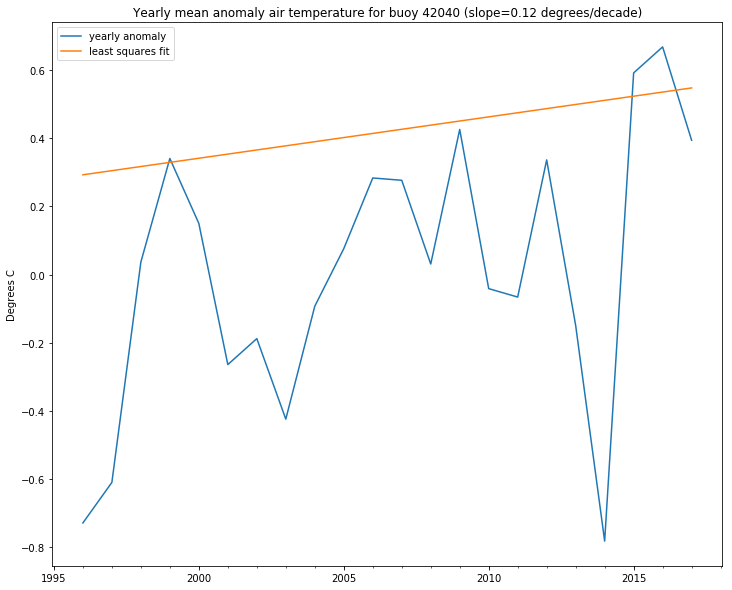

In [6]:
air_slope = plot_anomaly_graph(BUOYNO, 'air', all_months_air)


In [7]:
all_months_water = compute_anomalies(monthly, 'WTMP')
all_months_water.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Jan,-0.339183,0.783122,-1.395716,1.176469,0.814064,-0.896303,0.076476,-2.212570,-0.449979,-0.023535,...,0.783616,0.901778,NaN,-1.334372,0.435986,0.978493,-1.106644,0.784944,0.629814,0.052857
Feb,-0.219569,0.645283,-2.158602,1.771137,0.532790,0.315326,0.748222,-0.882972,-0.235483,0.663147,...,0.153277,1.857620,NaN,-1.198657,0.805690,0.711407,-1.007510,-0.434032,NaN,NaN
Mar,-1.296637,0.448270,-2.623627,-0.544699,1.058283,0.240898,-0.347909,-0.749925,0.168424,0.027820,...,NaN,1.078332,-1.183124,0.476004,2.610811,-0.493296,-1.003152,1.877038,NaN,NaN
Apr,-1.964287,-0.971608,-1.230286,0.762362,0.608915,0.426029,1.325760,-1.198347,-0.721389,-0.383740,...,NaN,-0.788888,-1.460152,1.038353,1.974995,-0.021207,-0.696064,1.625140,0.179004,1.213918
May,0.040465,-1.457229,0.437101,-0.171856,0.479954,-0.536974,0.456919,0.845074,-0.775570,-0.016819,...,1.082953,0.114523,0.967520,0.105102,1.460015,-1.540843,-1.204675,0.825854,-0.342807,-0.225937


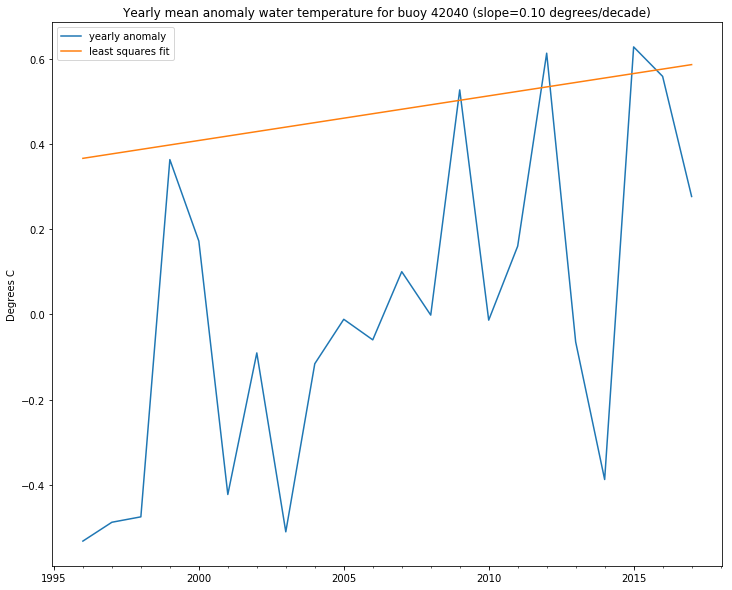

In [8]:
water_slope = plot_anomaly_graph(BUOYNO, 'water', all_months_water)


In [9]:
from dataworkspaces.kits.jupyter import NotebookLineageBuilder
with NotebookLineageBuilder('../results',
                            run_description="compute air and water anomaly for buoy %s" % BUOYNO)\
       .with_parameters({'buoy':BUOYNO})\
       .with_input_path('../intermediate-data/processed_%s.csv.gz'%BUOYNO)\
       .eval() as lineage:
    lineage.write_results({'air_slope':round(air_slope,3),
                          'water_slope':round(water_slope, 3),
                          'units':'degrees C per decade'})
print("Results:")
print("  Air slope:   %.3f degrees C per decade" % air_slope)
print("  Water slope: %.3f degrees C per decade" % water_slope)

Wrote results to results:results.json
Results:
  Air slope:   0.121 degrees C per decade
  Water slope: 0.105 degrees C per decade
